In [250]:
import requests

In [251]:
response = requests.get("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
# Querying a style with raster layers returns a JPEG
# and save the output as a JPEG image
# Retrieve a map at 72.873722 longitude, 19.211453 latitude, zoom 10.
# Bearing and pitch default to 0
# and save the output as a PNG image.

In [252]:
dark = requests.get("https://api.mapbox.com/styles/v1/mapbox/dark-v10/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
light = requests.get("https://api.mapbox.com/styles/v1/mapbox/light-v10/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
street = requests.get("https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")
satellite = requests.get("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q")


In [253]:
# print request object
print(response.url)
print(dark.url)

  
# print status code
print(response.status_code)
print(dark.status_code)
print(light.status_code)
print(street.status_code)
print(satellite.status_code)

https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q
https://api.mapbox.com/styles/v1/mapbox/dark-v10/static/72.861557,19.212009,15/298x954?access_token=pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q
200
200
200
200
200


In [254]:
file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff", "wb")
file.write(dark.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff", "wb")
file.write(light.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff", "wb")
file.write(street.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff", "wb")
file.write(satellite.content)
file.close()

file = open("/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff", "wb")
file.write(response.content)
file.close()

In [255]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [256]:
%pwd
%ls

 Untitled.ipynb   project/           sample_image.tiff
 manage.py*       sample_image.jpg   sundarbans_data/
 maps/            sample_image.png  'test application.ipynb'


In [257]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample_image.tiff'):
    print(name)

Check files ?:


In [258]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/project/sundarbans_data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff']

In [259]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [260]:
arr_st = np.stack(l)

In [261]:
arr_st.shape

(5, 954, 298)

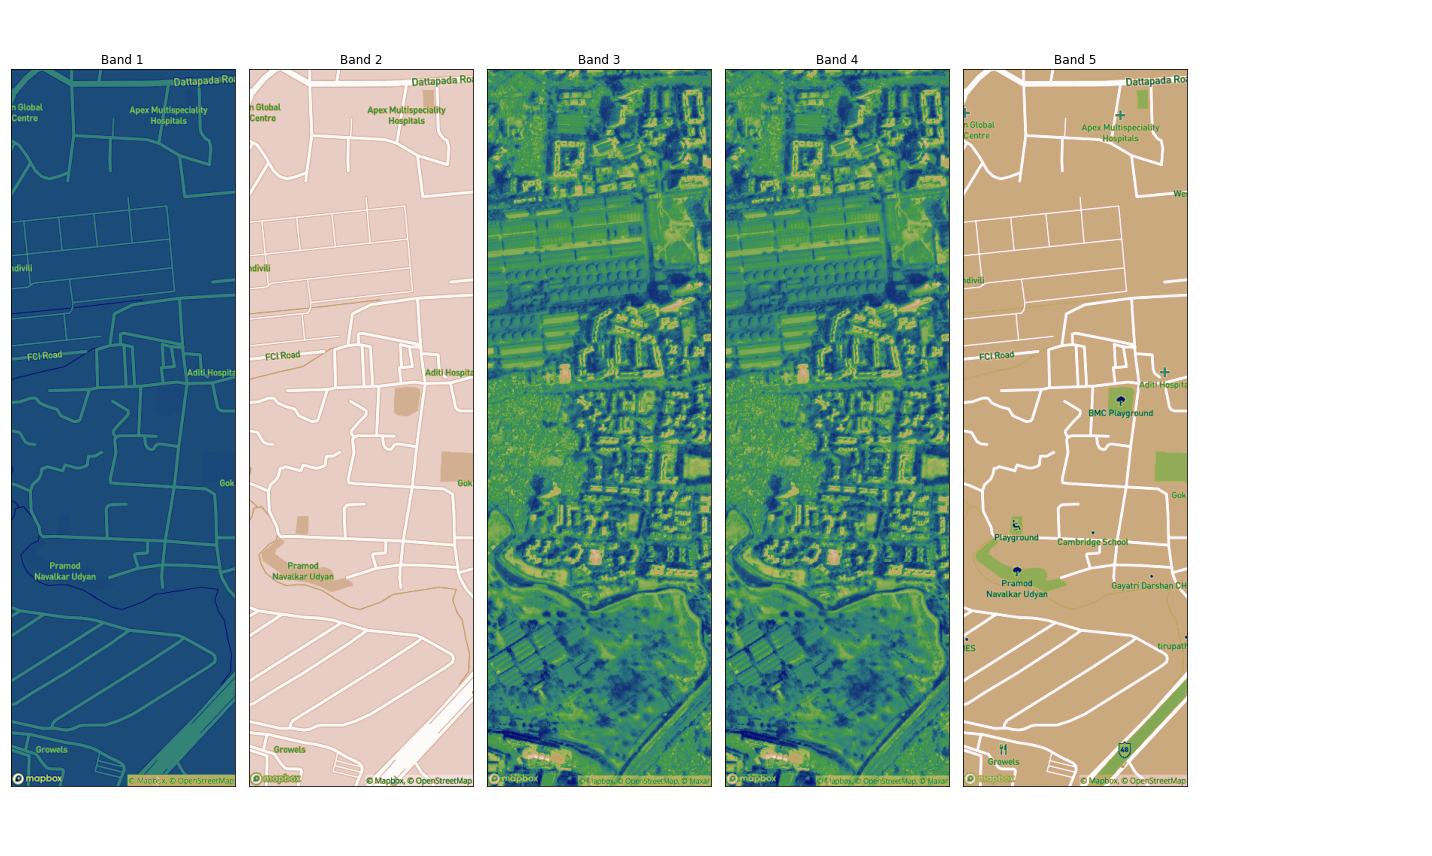

In [263]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

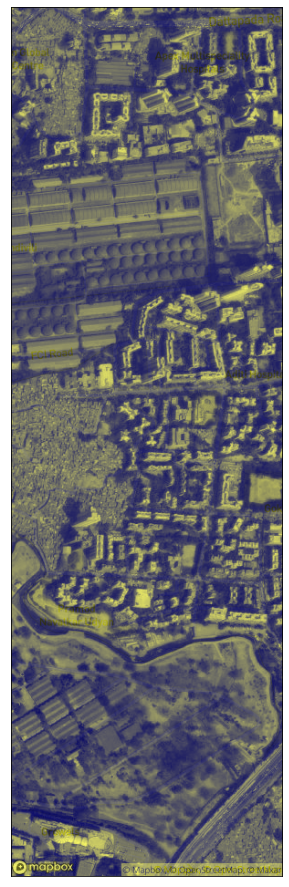

In [264]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

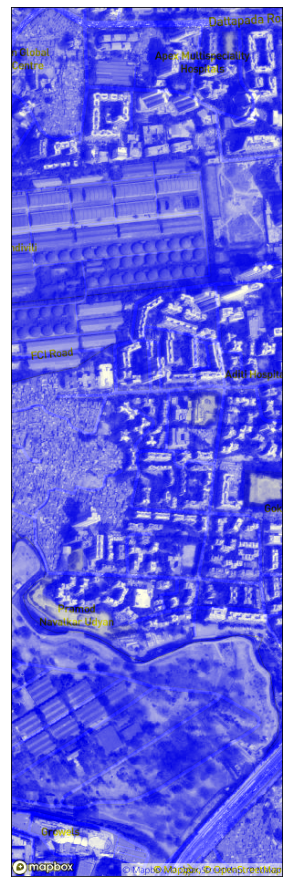

In [265]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

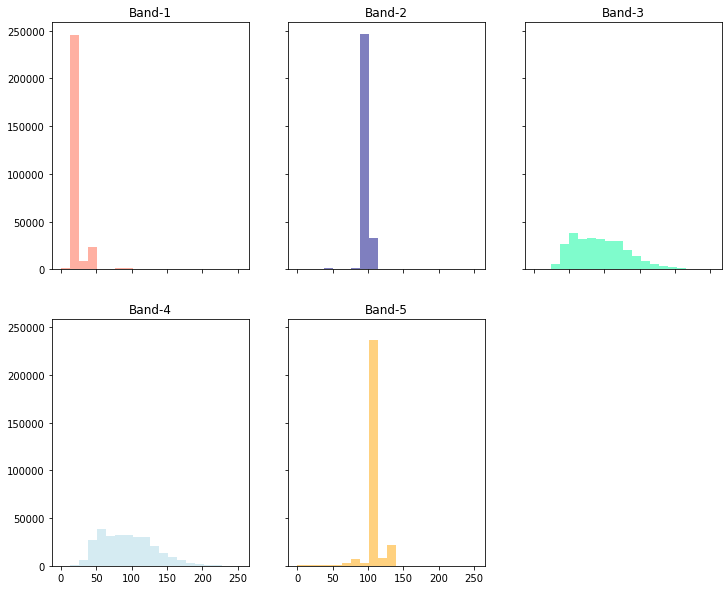

In [268]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 6)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

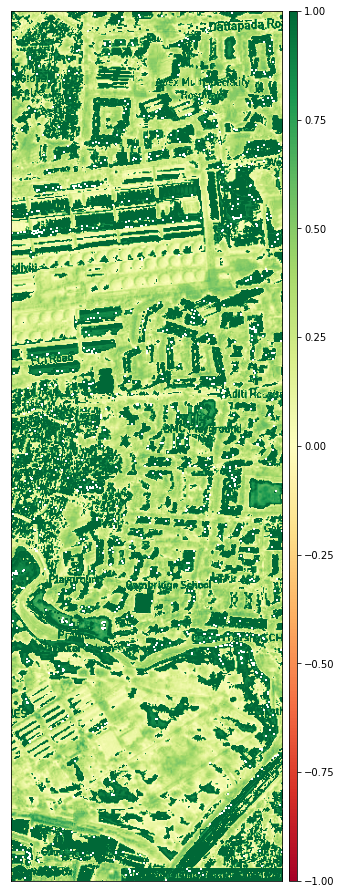

In [275]:
ndvi = es.normalized_diff(arr_st[4], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 16))

plt.show()